<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-2-Sprint-2-Regression/blob/master/Copy_of_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#choosing sqft_living as my variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
X = np.array(df['sqft_living']).reshape(-1, 1)
y = np.array(df['price']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
model.coef_, model.intercept_

(array([[280.2656509]]), array([-43344.76829407]))

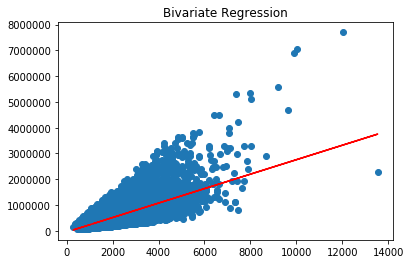

In [17]:
import matplotlib.pyplot as plt

y_pred = model.predict(X)


fig, ax =plt.subplots()
ax.scatter(X,y)
ax.plot(X,y_pred,color='r')

ax.set_title('Bivariate Regression');

In [18]:
#root mean sq err
np.sqrt(mean_squared_error(y, model.predict(X))),np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

(261441.49138333593, 260459.0634456004)

In [19]:
#R2
r2_score(y, model.predict(X)), r2_score(y_test, model.predict(X_test))

(0.49285049795872693, 0.49014149874909374)

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [23]:
#adding grade as new X variable
xvars=['sqft_living','grade']
XX=df[xvars]

XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.20, random_state=99)

model2 = LinearRegression()
model2.fit(XX_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
model2.coef_[0], model2.intercept_[0]

(array([  183.24225307, 99680.03256876]), -604824.6300490265)

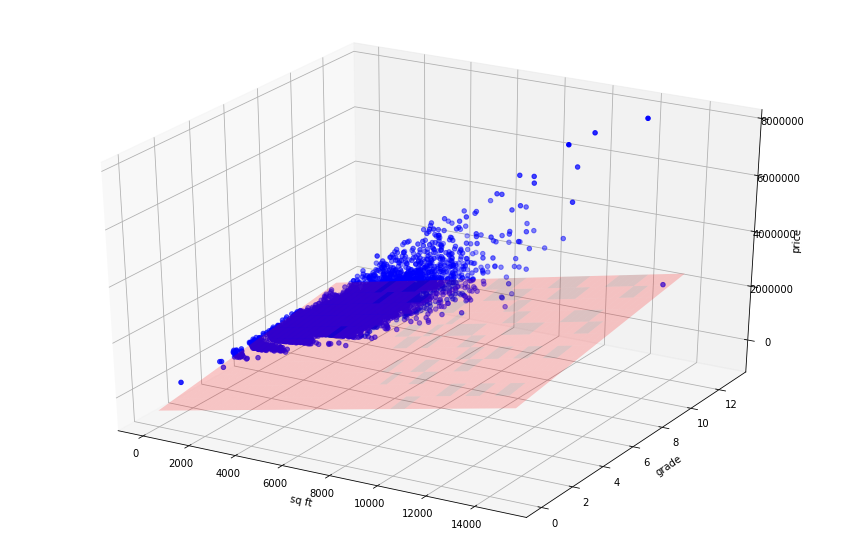

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig3d = plt.figure(figsize=(15,10))
ax3d = fig3d.add_subplot(111, projection='3d')
xs=df['sqft_living']
ys=df['grade']

#xx = np.linspace(min(xs),max(xs))
#yy = np.linspace(min(ys),max(ys))
xx, yy = np.meshgrid(range(15000), range(12))
z= model2.coef_[0][0]*xx+model2.coef_[0][1]*yy+model2.intercept_[0]

ax3d.plot_surface(xx, yy, z, alpha=0.2,color='r')

ax3d.scatter(xs, ys, y, c='b')

ax3d.set_xlabel('sq ft')
ax3d.set_ylabel('grade')
ax3d.set_zlabel('price');

In [39]:
#we can see our r2 is marginally better this time
r2_score(y, model2.predict(XX)), r2_score(y_test, model2.predict(XX_test))

(0.5344946681366993, 0.5271474243833477)

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [42]:
X_final = df.copy().drop(['price','id','date'],axis=1)
Xf_train, Xf_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=99)
modelf = LinearRegression()
modelf.fit(Xf_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
modelf.coef_[0], modelf.intercept_[0]

(array([-3.49149903e+04,  3.78584669e+04,  1.09340807e+02,  9.23740636e-02,
         1.00938258e+04,  6.30505125e+05,  5.32501466e+04,  2.65261912e+04,
         9.81955516e+04,  6.66716507e+01,  4.26691568e+01, -2.60176097e+03,
         2.52421349e+01, -6.03150370e+02,  6.01051281e+05, -2.08347477e+05,
         2.26102336e+01, -3.68063905e-01]), 9535773.25148722)

In [56]:
#we can see our r2 is much better this time, almost 68 for test data
r2_score(y, modelf.predict(X_final)), r2_score(y_test, modelf.predict(Xf_test))

(0.6994888848177796, 0.6795226353704384)

In [53]:
X_final.values

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
